In [58]:
import tensorflow as tf
tf.__version__
from tensorflow.keras import datasets, layers, models

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [5]:
cd 'gdrive/MyDrive/HackHealth2021'

/content/gdrive/MyDrive/HackHealth2021


In [14]:
!apt install unzip
!unzip "HACKATHON IMAGES".zip -d img

Streaming output truncated to the last 5000 lines.
  inflating: img/HACKATHON IMAGES/takoyaki/1/1256006.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/125755.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1261746.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1267793.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1283993.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/128746.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/128818.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1296570.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1298669.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/130350.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1309932.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1316132.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1317573.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1320117.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1321871.jpg  
  inflating: img/HACKATHON IMAGES/takoyaki/1/1322881.jpg  
  inflati

In [37]:
def img_mirror(img):
  h, w = img.shape
  retimg = np.zeros((h, w), dtype = np.int16)
  for i in range(0, h):
    retimg[i][:] = img[i][::-1]
  
  return retimg

def img_rot(img, angle):
  r, c = img.shape
  rot = cv2.getRotationMatrix2D((c/2, r/2), angle, 1)
  rotimg = cv2.warpAffine(img, rot, (c, r))
  return rotimg

def imshow(img):
  npimg = img / 2 + 0.5
  plt.figure
  plt.imshow(npimg, 'gray')
  plt.show()

In [20]:
cd 'img/HACKATHON IMAGES/'

/content/gdrive/My Drive/HackHealth2021/img/HACKATHON IMAGES


In [21]:
class_names = glob('*')
print(class_names)

['apple', 'apple_pie', 'Apricot', 'avocado', 'baby_back_ribs', 'baklava', 'Banana', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'Blueberry', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'cantelope', 'caprese_salad', 'carrot_cake', 'Cauliflower', 'ceviche', 'cheesecake', 'cherry', 'Chestnut', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'Clementine', 'club_sandwich', 'corn', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'Dates', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'Eggplant', 'eggs_benedict', 'escargots', 'falafel', 'Fig', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'Ginger Root', 'gnocchi', 'grape', 'grapefruit', 'greek_salad', 'Green Pepper', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'Gu

In [27]:
print('' + class_names[0] + '/*/')


apple/*/


In [60]:
def load_dataset(class_names):
  data = []
  label = []
  for i in class_names:
    fols = glob('' + i + '/*/')
    print(fols)
    for j in fols:
      img_paths = glob('' + j + '/*.jpg')
      for files in img_paths:
        img = cv2.imread(files)
        img = cv2.resize(img, (128, 128), cv2.INTER_LINEAR)
        img = np.transpose(img, [2, 0, 1])
        label.append(i)
        data.append(img)
    
  return label, data
  
labels, trainddata = load_dataset(class_names)


['apple/1/', 'apple/10/', 'apple/11/', 'apple/12/', 'apple/13/', 'apple/2/', 'apple/3/', 'apple/4/', 'apple/5/', 'apple/6/', 'apple/7/', 'apple/8/', 'apple/9/']
['apple_pie/1/']
['Apricot/1/']
['avocado/1/', 'avocado/2/']
['baby_back_ribs/1/']
['baklava/1/']
['Banana/1/']
['beef_carpaccio/1/']
['beef_tartare/1/']
['beet_salad/1/']
['beignets/1/']
['bibimbap/1/']
['Blueberry/1/']
['bread_pudding/1/']
['breakfast_burrito/1/']
['bruschetta/1/']
['caesar_salad/1/']
['cannoli/1/']
['cantelope/1/', 'cantelope/2/']
['caprese_salad/1/']
['carrot_cake/1/']
['Cauliflower/1/']
['ceviche/1/']
['cheesecake/1/']
['cherry/1/', 'cherry/2/', 'cherry/3/', 'cherry/4/', 'cherry/5/', 'cherry/6/']
['Chestnut/1/']
['chicken_curry/1/']
['chicken_quesadilla/1/']
['chicken_wings/1/']
['chocolate_cake/1/']
['chocolate_mousse/1/']
['churros/1/']
['clam_chowder/1/']
['Clementine/1/']
['club_sandwich/1/']
['corn/1/', 'corn/2/']
['crab_cakes/1/']
['creme_brulee/1/']
['croque_madame/1/']
['cup_cakes/1/']
['Dates/1/']

KeyboardInterrupt: ignored

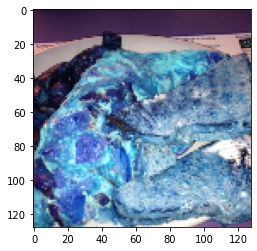

In [54]:
# show some images
def imshow(img):
    if len(img.shape) > 2:
        img = np.transpose(img, [1, 2, 0])
    plt.figure
    plt.imshow(img)
    plt.show()
    
imshow(trainddata[76567])

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(trainddata, labels))